<a href="https://colab.research.google.com/github/peteray-dev/ML_LinReg_Adv_Sales/blob/master/Adv_Lr_on_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv',
    index_col=0
)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<Axes: xlabel='newspaper', ylabel='sales'>

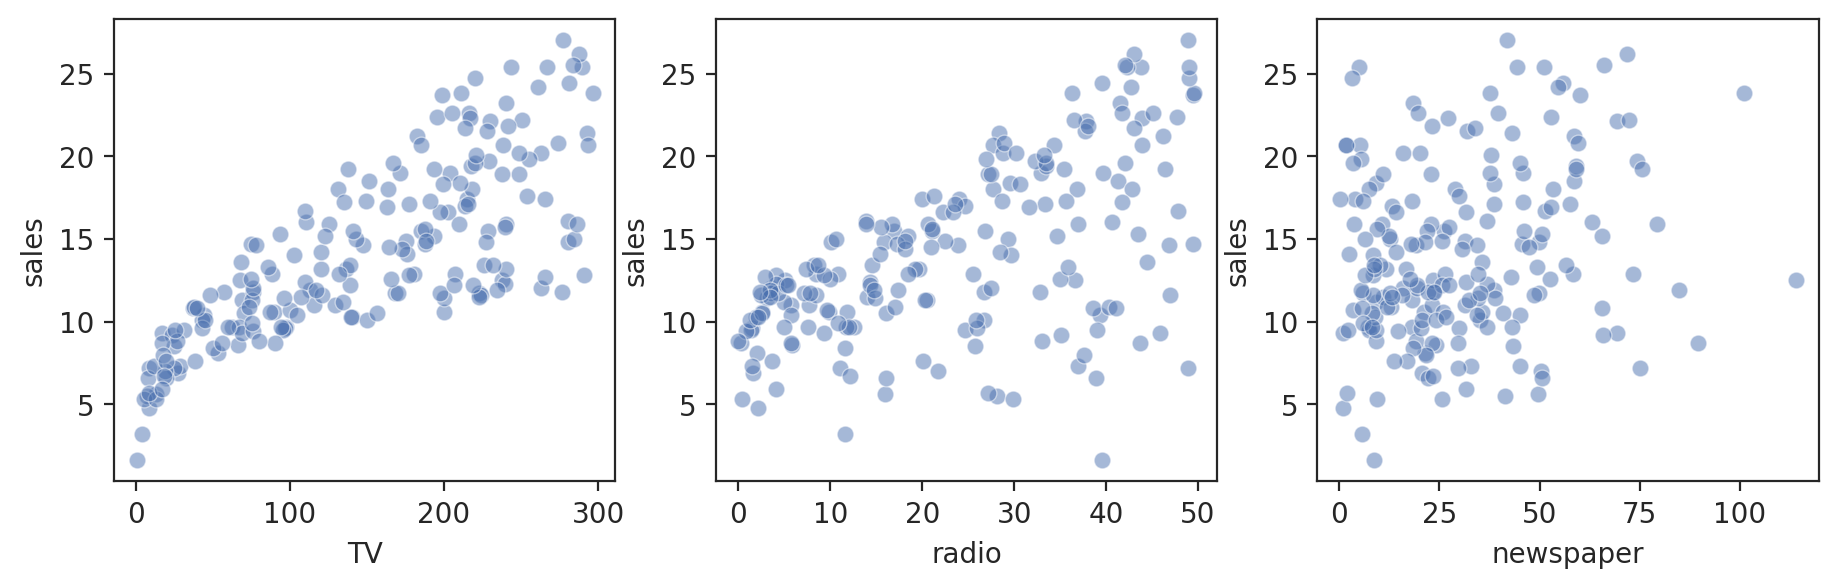

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(11,3))
sns.scatterplot(adv, x='TV', y='sales', alpha=0.5, ax=axs[0])
sns.scatterplot(adv, x='radio', y='sales', alpha=0.5, ax=axs[1])
sns.scatterplot(adv, x='newspaper', y='sales', alpha=0.5, ax=axs[2])

In [15]:
X = adv.drop(columns='sales')
y = adv['sales']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

In [27]:
#Trying the model on a single feature inorder to achieve a view of the data
#and a deatil work of the model

X_tv_train = X_train[['TV']]
X_tv_test = X_test[['TV']]

In [28]:
lr1 = LinearRegression()
lr1.fit(X_tv_train, y_train)

LinearRegression()

In [36]:
linear_test_set = pd.DataFrame(
    np.linspace(X[['TV']].min(), X[['TV']].max(), 500), columns=X_tv_train.columns
)


In [ ]:
y_pred = lr1.predict(linear_test_set)
y_pred

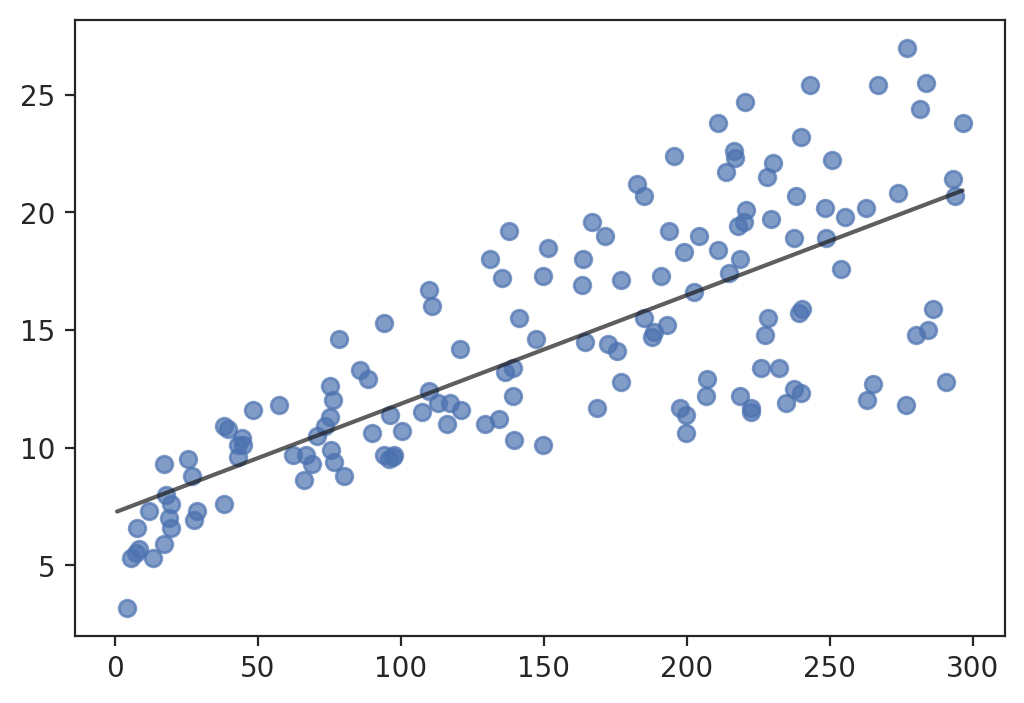

In [54]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X_tv_train, y_train, alpha=0.7);
ax.plot(linear_test_set, y_pred, '-k', alpha=0.7);

In [55]:
lr1.coef_

array([0.04614341])

In [56]:
lr1.intercept_

7.248909283005854

In [58]:
mean_absolute_error(y_train, lr1.predict(X_tv_train))

2.6490233066010336

In [59]:
mean_absolute_error(y_test, lr1.predict(X_tv_test))

2.298513328039085

In [69]:
lr1.score(X_tv_test, y_test), lr1.score(X_tv_train, y_train)

(0.6902574858002379, 0.5767451599400782)

In [66]:
#Multivariate Lineear Regression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
#Aggregate Score
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9072183330817297, 0.8576396745320893)

In [71]:
mean_absolute_error(y_test, lr.predict(X_test))

1.3000320919235449

In [72]:
lr.coef_ , lr.intercept_

(array([0.04416235, 0.19900368, 0.00116268]), 2.8925700511511483)

In [85]:
#Comparing the prediction with actual

y_test.iloc[0]

11.3

In [86]:
lr.predict(X_test.iloc[[0]])

array([10.0494569])

In [88]:
y_test.head().to_numpy()

array([11.3,  8.4,  8.7, 25.4, 11.7])

In [94]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643])

In [95]:
mean_absolute_error(y_test, y_pred)

1.3000320919235449

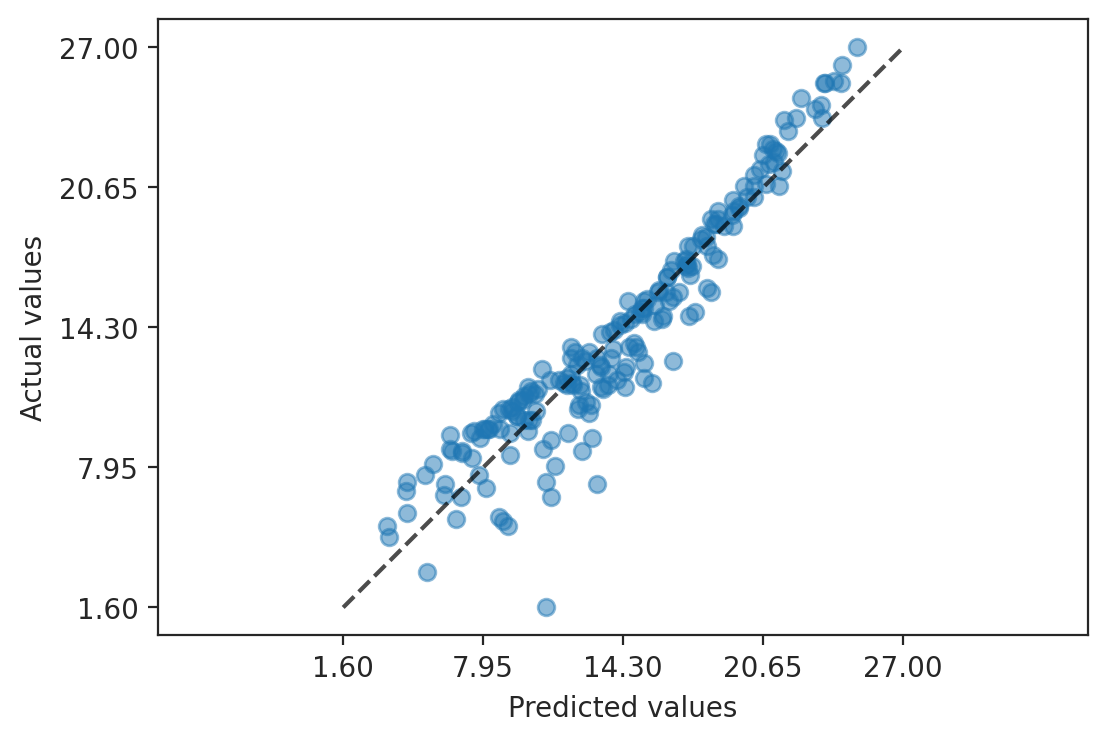

In [102]:
#Actual VS Predicted

PredictionErrorDisplay.from_estimator(
    lr, X, y, kind="actual_vs_predicted", scatter_kwargs = dict(alpha=0.5)
);